In [ ]:
import pandas as pd
import os
import shutil
import random


csv_path = "F:/Dataset_Proj419/chemin_du_fichier_modifié.csv"
images_dir = 'F:/Dataset_Proj419/resized_train/resized_train'
output_dir = 'F:/balanced_Emmanuel'

# Nombre d’images par classe
target_count = 708

df = pd.read_csv(csv_path)

# Extraire juste le nom du fichier depuis la colonne 'image path'
df['filename'] = df['image_path'].apply(lambda x: os.path.basename(x))

# Créer le dossier de sortie
os.makedirs(output_dir, exist_ok=True)

# Grouper par label
grouped = df.groupby('level')  

for label, group in grouped:
    # Échantillonner 708 images
    sampled = group.sample(n=target_count, random_state=42)

    # Créer dossier de classe
    class_dir = os.path.join(output_dir, str(label))
    os.makedirs(class_dir, exist_ok=True)

    for _, row in sampled.iterrows():
        filename = row['filename']
        src_path = os.path.join(images_dir, filename)
        dst_path = os.path.join(class_dir, filename)

        if os.path.exists(src_path):
            shutil.copy2(src_path, dst_path)
        else:
            print(f"Image non trouvée : {src_path}")

    print(f"Classe {label} : {len(sampled)} images copiées ✅")

print("✅ Undersampling terminé avec succès.")


Classe 0 : 708 images copiées ✅
Classe 1 : 708 images copiées ✅
Classe 2 : 708 images copiées ✅
Classe 3 : 708 images copiées ✅
Classe 4 : 708 images copiées ✅
✅ Undersampling terminé avec succès.


In [ ]:
import os
import shutil
import random

balanced_dir = 'F:/balanced_Emmanuel'
output_split_dir = 'F:/Split_Emmanuel'

# Proportions
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Création les dossiers (train/val/test)
splits = ['train', 'val', 'test']
for split in splits:
    for class_name in os.listdir(balanced_dir):
        split_class_dir = os.path.join(output_split_dir, split, class_name)
        os.makedirs(split_class_dir, exist_ok=True)

# Parcourir chaque classe
for class_name in os.listdir(balanced_dir):
    class_dir = os.path.join(balanced_dir, class_name)
    images = os.listdir(class_dir)
    random.shuffle(images)

    total = len(images)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)

    train_imgs = images[:train_end]
    val_imgs = images[train_end:val_end]
    test_imgs = images[val_end:]

    for split_name, split_images in zip(splits, [train_imgs, val_imgs, test_imgs]):
        for img in split_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(output_split_dir, split_name, class_name, img)
            shutil.copy2(src, dst)

    print(f"{class_name} : {len(train_imgs)} train, {len(val_imgs)} val, {len(test_imgs)} test")

print("✅ Dataset divisé avec succès en train / val / test.")


0 : 495 train, 106 val, 107 test
1 : 495 train, 106 val, 107 test
2 : 495 train, 106 val, 107 test
3 : 495 train, 106 val, 107 test
4 : 495 train, 106 val, 107 test
✅ Dataset divisé avec succès en train / val / test.


In [ ]:
import os
import pandas as pd


split_root = 'F:/Split_Emmanuel'

csv_output_dir = 'F:/Split_Emmanuel'

# Liste des splits à traiter
splits = ['train', 'val', 'test']

for split in splits:
    data = []

    split_dir = os.path.join(split_root, split)
    for class_name in os.listdir(split_dir):
        class_path = os.path.join(split_dir, class_name)
        for filename in os.listdir(class_path):
            data.append({
                'filename': filename,
                'level': int(class_name)
            })

    df = pd.DataFrame(data)
    csv_path = os.path.join(csv_output_dir, f'{split}.csv')
    df.to_csv(csv_path, index=False)

    print(f"✅ CSV généré : {csv_path} ({len(df)} lignes)")


✅ CSV généré : F:/Split_Emmanuel\train.csv (2475 lignes)
✅ CSV généré : F:/Split_Emmanuel\val.csv (530 lignes)
✅ CSV généré : F:/Split_Emmanuel\test.csv (535 lignes)


In [ ]:
train_df['level'] = train_df['level'].astype(str)
val_df['level'] = val_df['level'].astype(str)
test_df['level'] = test_df['level'].astype(str)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os



train_df =  pd.read_csv ('E:/Split_Emmanuel/train.csv')
val_df= pd.read_csv ('E:/Split_Emmanuel/val.csv')
test_df=  pd.read_csv('E:/Split_Emmanuel/test.csv')


train_df["filename"] = train_df["level"].astype(str) + "/" + train_df["filename"]
val_df["filename"] = val_df["level"].astype(str) + "/" + val_df["filename"]
test_df["filename"] = test_df["level"].astype(str) + "/" + test_df["filename"]



train_df['level'] = train_df['level'].astype(str)
val_df['level'] = val_df['level'].astype(str)
test_df['level'] = test_df['level'].astype(str)

# Générateur avec augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    zoom_range=0.20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory="E:/Split_Emmanuel/train",
    x_col="filename",
    y_col="level",
    target_size=(224,224),
    batch_size=8,
    class_mode="categorical",
    shuffle=True
)

val_generator =val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory="E:/Split_Emmanuel/val",
    x_col="filename",
    y_col="level",
    target_size=(224,224),
    batch_size=8,
    class_mode="categorical",
    shuffle=False
)

test_generator =test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="E:/Split_Emmanuel/test",
    x_col="filename",
    y_col="level",
    target_size=(224,224),
    batch_size=8,
    class_mode="categorical",
    shuffle=False
)


Found 2475 validated image filenames belonging to 5 classes.
Found 530 validated image filenames belonging to 5 classes.
Found 535 validated image filenames belonging to 5 classes.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from skimage.feature import graycomatrix, graycoprops
from skimage.filters import rank
from skimage.morphology import disk
from skimage import exposure
from torchvision import models, transforms
import torch
from torchvision.io import read_image
from tqdm import tqdm

from PIL import Image

#
output_dir = 'F:/Split_Emmanuel/features'
os.makedirs(output_dir, exist_ok=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Charger ResNet50 sans la dernière couche (2048-dim)
resnet = models.resnet50(pretrained=True)
resnet = torch.nn.Sequential(*list(resnet.children())[:-1])
resnet.to(device)
resnet.eval()

# Transformations pour ResNet50
resnet_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def extract_texture_features(gray_img):
    gray_img_8 = cv2.normalize(gray_img, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    glcm = graycomatrix(gray_img_8, distances=[1], angles=[0], symmetric=True, normed=True)
    
    contrast = graycoprops(glcm, 'contrast')[0, 0]
    homogeneity = graycoprops(glcm, 'homogeneity')[0, 0]
    energy = graycoprops(glcm, 'energy')[0, 0]

    entropy_val = -np.sum(glcm * np.log2(glcm + 1e-10))

    return contrast, homogeneity, energy, entropy_val

def extract_color_stats(img):
    means = np.mean(img, axis=(0, 1))
    stds = np.std(img, axis=(0, 1))
    kurt = kurtosis(img.reshape(-1, 3), axis=0)
    return means, stds, kurt

def dominant_color(img, k=3):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_flat = img_rgb.reshape((-1, 3)).astype(np.float32)

    _, labels, centers = cv2.kmeans(img_flat, k, None,
                                    (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0),
                                    10, cv2.KMEANS_RANDOM_CENTERS)
    counts = np.bincount(labels.flatten())
    dominant = centers[np.argmax(counts)]
    return dominant

def extract_resnet_features(img_path):
    img = Image.open(img_path).convert('RGB')
    input_tensor = resnet_transform(img).unsqueeze(0).to(device)
    with torch.no_grad():
        features = resnet(input_tensor).squeeze().cpu().numpy()
    return features

def extract_features_from_image(img_path):
    img_bgr = cv2.imread(img_path)
    if img_bgr is None:
        return None
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # Texture features
    contrast, homogeneity, energy, entropy_val = extract_texture_features(gray)

    # Variance locale
    var_local = rank.mean(cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8), disk(5)).var()

    # Statistiques RGB
    mean_rgb, std_rgb, kurt_rgb = extract_color_stats(img_bgr)

    # Dominante couleur
    dom_color = dominant_color(img_bgr)

    # Deep features
    resnet_feat = extract_resnet_features(img_path)

    # === Microanevrismes (zones sombres) ===
    blurred = cv2.medianBlur(gray, 5)
    _, micro_mask = cv2.threshold(blurred, 30, 255, cv2.THRESH_BINARY_INV)  # sombre
    contours_micro, _ = cv2.findContours(micro_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    micro_surface = sum(cv2.contourArea(c) for c in contours_micro)
    micro_perimeter = sum(cv2.arcLength(c, True) for c in contours_micro)
    micro_count = len(contours_micro)

    # === Exsudats (zones très claires) ===
    _, exsudat_mask = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY)  # clair
    contours_exsud, _ = cv2.findContours(exsudat_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    exsud_surface = sum(cv2.contourArea(c) for c in contours_exsud)
    exsud_perimeter = sum(cv2.arcLength(c, True) for c in contours_exsud)
    exsud_count = len(contours_exsud)

    # Tout concaténer
    features = np.concatenate((
        resnet_feat,
        [entropy_val, energy, contrast, homogeneity, var_local],
        mean_rgb, std_rgb, kurt_rgb,
        dom_color,
        [micro_surface, micro_perimeter, micro_count,
         exsud_surface, exsud_perimeter, exsud_count]
    ))

    return features


# Colonnes de features
resnet_cols = [f'resnet_{i}' for i in range(2048)]
other_cols = ['entropy', 'energy', 'contrast', 'homogeneity', 'var_local'] + \
             ['mean_r', 'mean_g', 'mean_b'] + ['std_r', 'std_g', 'std_b'] + \
             ['kurt_r', 'kurt_g', 'kurt_b'] + ['dom_r', 'dom_g', 'dom_b']

lesion_cols = ['micro_surface', 'micro_perimeter', 'micro_count',
               'exsud_surface', 'exsud_perimeter', 'exsud_count']

all_columns = ['filename', 'level'] + resnet_cols + other_cols + lesion_cols

# Traitement de chaque split
splits = ['train', 'val', 'test']
for split in splits:
    data = []
    print(f"\n📦 Traitement de : {split}")
    split_path = os.path.join(split_root, split)
    for class_name in os.listdir(split_path):
        class_dir = os.path.join(split_path, class_name)
        for img_name in tqdm(os.listdir(class_dir)):
            img_path = os.path.join(class_dir, img_name)
            features = extract_features_from_image(img_path)
            if features is not None:
                row = [img_name, int(class_name)] + list(features)
                data.append(row)

    df = pd.DataFrame(data, columns=all_columns)
    csv_path = os.path.join(output_dir, f'{split}_features.csv')
    df.to_csv(csv_path, index=False)
    print(f"✅ Sauvegardé : {csv_path} ({len(df)} images)")



📦 Traitement de : train


100%|██████████| 495/495 [12:58<00:00,  1.57s/it]


✅ Sauvegardé : F:/Split_Emmanuel/features\train_features.csv (2475 images)

📦 Traitement de : val


100%|██████████| 106/106 [02:56<00:00,  1.66s/it]


✅ Sauvegardé : F:/Split_Emmanuel/features\val_features.csv (530 images)

📦 Traitement de : test


100%|██████████| 107/107 [02:58<00:00,  1.67s/it]


✅ Sauvegardé : F:/Split_Emmanuel/features\test_features.csv (535 images)


In [2]:
import pandas as pd

df = pd.read_csv("F:/Split_Emmanuel/features/train_features.csv")
X = df.drop(['filename', 'level'], axis=1)
y = df['level']


In [3]:
grouped_mean = X.copy()
grouped_mean['level'] = y
mean_by_class = grouped_mean.groupby('level').mean()
display(mean_by_class)


,resnet_0,resnet_1,resnet_2,resnet_3,resnet_4,resnet_5,resnet_6,resnet_7,resnet_8,resnet_9,...,kurt_b,dom_r,dom_g,dom_b,micro_surface,micro_perimeter,micro_count,exsud_surface,exsud_perimeter,exsud_count
level,,,,,,,,,,,,,,,,,,,,,
0,0.298265,0.460461,0.134408,0.040567,0.218210,0.590604,0.293399,0.923782,0.857644,0.444856,...,-0.535463,53.411252,53.411252,53.411252,421884.394949,4383.433038,5.595960,2940.522222,241.015570,1.959596
1,0.247162,0.362090,0.129843,0.032517,0.263881,0.655973,0.331504,0.968819,0.546021,0.297348,...,-0.612044,64.578284,49.615560,39.712170,408298.312121,4488.796175,6.632323,2076.065657,228.029411,2.101010
2,0.231543,0.346121,0.120847,0.043410,0.257606,0.656218,0.319323,0.958490,0.493372,0.279240,...,-0.453842,61.209628,46.169344,35.185087,427947.932323,4389.565211,6.335354,2580.619192,210.578042,1.593939
3,0.320039,0.538053,0.102815,0.055322,0.228553,0.573767,0.285705,0.814252,0.707145,0.354182,...,-0.363541,49.942380,46.841147,44.560405,446575.697980,4279.090110,5.351515,2435.288889,194.366896,1.769697
4,0.375176,0.766669,0.090568,0.073240,0.224962,0.435386,0.227490,0.644456,0.839005,0.343994,...,-0.415146,55.382028,55.382028,55.382028,410995.987879,4329.452910,5.820202,4164.005051,239.189906,1.852525


In [10]:
from sklearn.feature_selection import f_classif
import numpy as np

f_values, p_values = f_classif(X, y)

# Récupérer les features les plus discriminantes
top_indices = np.argsort(f_values)[::-1][:25]  # Top 20
top_features = X.columns[top_indices]
print("Top 25 features les plus discriminantes :")
print(top_features)


Top 25 features les plus discriminantes :
Index(['resnet_945', 'resnet_1436', 'resnet_1859', 'resnet_624', 'resnet_1528',
       'resnet_1135', 'resnet_1230', 'resnet_198', 'resnet_59', 'resnet_1954',
       'resnet_27', 'resnet_805', 'resnet_1783', 'resnet_1064', 'resnet_810',
       'resnet_586', 'resnet_1293', 'resnet_1294', 'resnet_1365', 'resnet_69',
       'resnet_1385', 'resnet_1382', 'resnet_1926', 'resnet_1834',
       'resnet_16'],
      dtype='object')


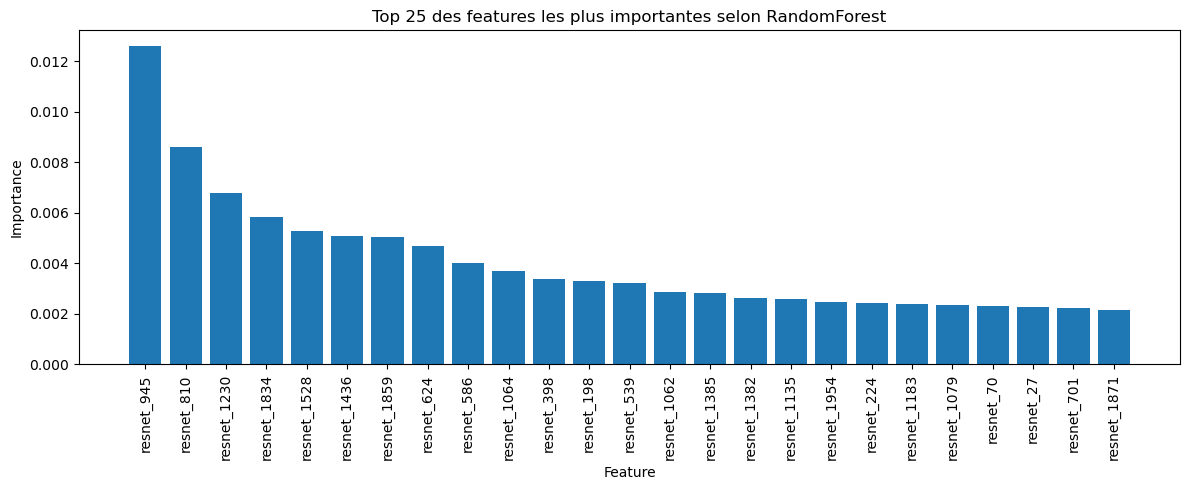

In [11]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Charger les données
df = pd.read_csv("F:/Split_Emmanuel/features/train_features.csv")
X = df.drop(['filename', 'level'], axis=1)
y = df['level']

# Entraîner le modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Récupérer l'importance des features
importances = rf.feature_importances_
top_indices = np.argsort(importances)[-25:][::-1]
top_features = X.columns[top_indices]
top_importances = importances[top_indices]

# Afficher
plt.figure(figsize=(12,5))
plt.bar(range(len(top_importances)), top_importances)
plt.xticks(ticks=range(len(top_importances)), labels=top_features, rotation=90)
plt.title("Top 25 des features les plus importantes selon RandomForest")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_2832\2480646427.py:17: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


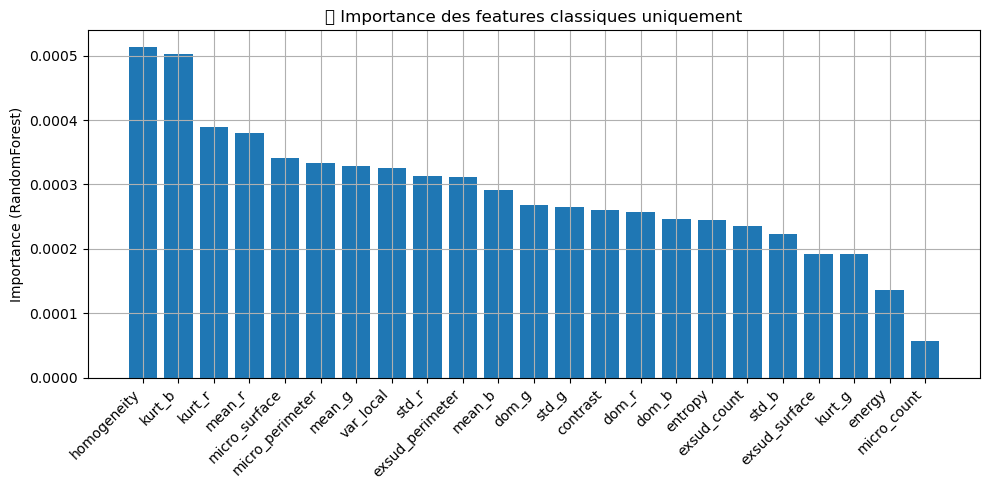

In [7]:
# Filtrer les features classiques (non-ResNet)
classic_cols = [col for col in X.columns if not col.startswith('resnet_')]
classic_importances = rf.feature_importances_[[X.columns.get_loc(col) for col in classic_cols]]

# Trier
sorted_idx = np.argsort(classic_importances)[::-1]
sorted_classic_names = [classic_cols[i] for i in sorted_idx]
sorted_classic_importances = classic_importances[sorted_idx]

# Afficher
plt.figure(figsize=(10, 5))
plt.bar(range(len(sorted_classic_importances)), sorted_classic_importances)
plt.xticks(ticks=range(len(sorted_classic_importances)), labels=sorted_classic_names, rotation=45, ha='right')
plt.title("✨ Importance des features classiques uniquement")
plt.ylabel("Importance (RandomForest)")
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\PATRICE\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [08:45:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Set Performance:
              precision    recall  f1-score   support

           0       0.54      0.83      0.66       106
           1       0.45      0.35      0.39       106
           2       0.52      0.56      0.54       106
           3       0.59      0.30      0.40       106
           4       0.69      0.77      0.73       106

    accuracy                           0.56       530
   macro avg       0.56      0.56      0.54       530
weighted avg       0.56      0.56      0.54       530

Test Set Performance:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68       107
           1       0.51      0.43      0.46       107
           2       0.49      0.51      0.50       107
           3       0.46      0.30      0.36       107
           4       0.67      0.71      0.69       107

    accuracy                           0.56       535
   macro avg       0.54      0.56      0.54       535
weighted avg       0.54    

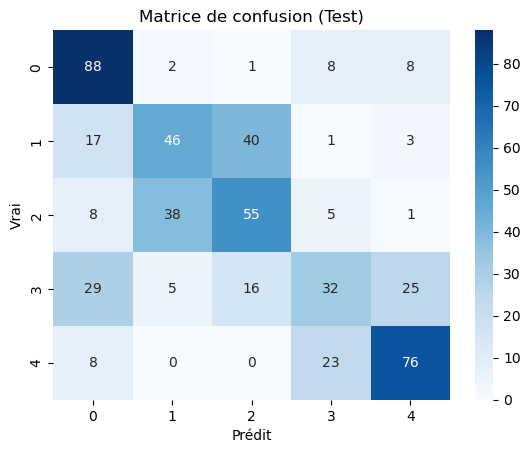

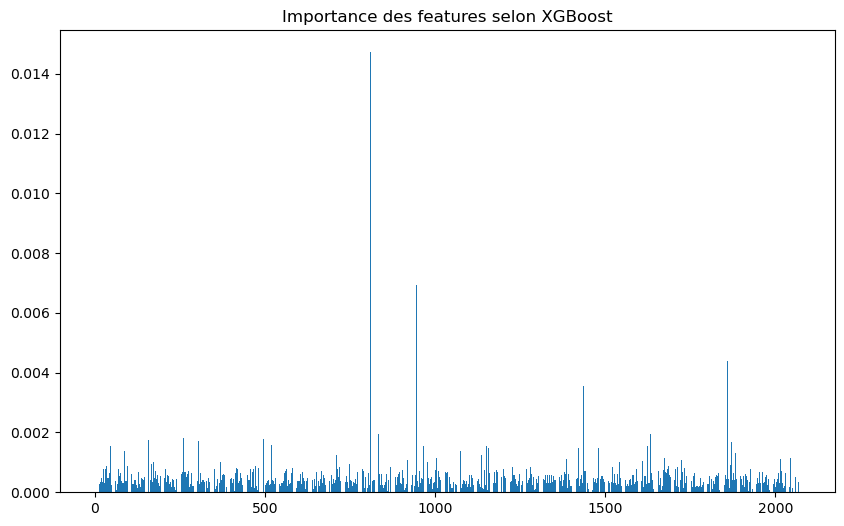

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import xgboost as xgb
import joblib

# 1. Charger les CSV
train_df = pd.read_csv("E:/Split_Emmanuel/features/train_features.csv")
val_df = pd.read_csv("E:/Split_Emmanuel/features/val_features.csv")
test_df = pd.read_csv("E:/Split_Emmanuel/features/test_features.csv")

# 2. Séparer features (X) et labels (y)
X_train = train_df.drop(columns=['level','filename']) 
y_train = train_df['level']

X_val = val_df.drop(columns=['level','filename'])
y_val = val_df['level']

X_test = test_df.drop(columns=['level','filename'])
y_test = test_df['level']

# 3. Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# 4. Entraînement du modèle
model = XGBClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
model.fit(X_train_scaled, y_train)

# Imaginons que ton modèle s'appelle `model`
model.save_model("xgboost_model.json")


joblib.dump(scaler, "scaler.pkl")  


# 5. Évaluation
print("Validation Set Performance:")
y_val_pred = model.predict(X_val_scaled)
print(classification_report(y_val, y_val_pred))

print("Test Set Performance:")
y_test_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

# 6. Matrice de confusion
import seaborn as sns
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion (Test)")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.show()

# 7. (Optionnel) Importance des features
plt.figure(figsize=(10, 6))
xgb_importances = model.feature_importances_
plt.bar(range(len(xgb_importances)), xgb_importances)
plt.title("Importance des features selon XGBoost")
plt.show()


In [ ]:
import pandas as pd
import xgboost as xgb
import joblib

# === 1. Charger toutes les features déjà extraites ===
all_features_df = pd.read_csv("E:/Split_Emmanuel/features/test_features.csv")

sample_df = all_features_df.head(6)


# 3. Préparer les données 
X_sample = sample_df.drop(columns=["filename", "level"], errors="ignore")

# 4. Charger le scaler et le modèle 
scaler = joblib.load("scaler.pkl")

model = xgb.XGBClassifier()
model.load_model("xgboost_model.json")

#  5. Standardiser les features 
X_sample_scaled = scaler.transform(X_sample)

# 6. Prédire avec XGBoost
preds = model.predict(X_sample_scaled)

# 7. Afficher les résultats 
result_df = pd.DataFrame({
    "Image": sample_df["filename"],
    "Classe prédite": preds
})

print(result_df)


              Image  Classe prédite
0   10790_left.jpeg               3
1  11607_right.jpeg               3
2  11909_right.jpeg               0
3   11992_left.jpeg               0
4  12026_right.jpeg               0
5   14008_left.jpeg               1


In [18]:
import torch
import torchvision
from torchvision import transforms

# Définir la transformation
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Charger les données
train_data = torchvision.datasets.ImageFolder(root= "E:/Split_Emmanuel/train", transform=transform)
val_data = torchvision.datasets.ImageFolder(root="E:/Split_Emmanuel/val", transform=transform)

# Définir les dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=8, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=8, shuffle=False, num_workers=4)

In [19]:
import torch.nn as nn
import torch.optim as optim
from torchvision.models import resnet50

# Définir le modèle
model = resnet50(pretrained=True)

# Remplacer la dernière couche
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_data.classes))

# Définir la fonction de perte et l'optimiseur
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Déplacer le modèle vers le dispositif
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\PATRICE\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\PATRICE\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Réinitialiser les gradients
        optimizer.zero_grad()

        # Passer les données à travers le modèle
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Rétropropagation et optimisation
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%')
    
    
torch.save(model.state_dict(), 'resnet50_finetuned.pth')

Epoch [1/10], Loss: 1.2362, Accuracy: 48.53%
Epoch [2/10], Loss: 1.0698, Accuracy: 56.62%
Epoch [3/10], Loss: 0.9397, Accuracy: 61.67%
Epoch [4/10], Loss: 0.8375, Accuracy: 66.53%
Epoch [5/10], Loss: 0.7390, Accuracy: 69.79%
Epoch [6/10], Loss: 0.5945, Accuracy: 77.25%
Epoch [7/10], Loss: 0.5426, Accuracy: 79.80%
Epoch [8/10], Loss: 0.4351, Accuracy: 83.89%
Epoch [9/10], Loss: 0.3487, Accuracy: 86.74%
Epoch [10/10], Loss: 0.3188, Accuracy: 88.22%


In [ ]:
model.eval()  
val_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Loss: {val_loss/len(val_loader):.4f}, val Accuracy: {100 * correct / total:.2f}%')

Test Loss: 0.5437, val Accuracy: 85.95%


In [ ]:
# Recréer le modèle
model = resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(train_data.classes))  

# Charger les poids sauvegardés
model.load_state_dict(torch.load('resnet50_finetuned.pth'))

# Déplacer le modèle vers le dispositif
model = model.to(device)
model.eval()  

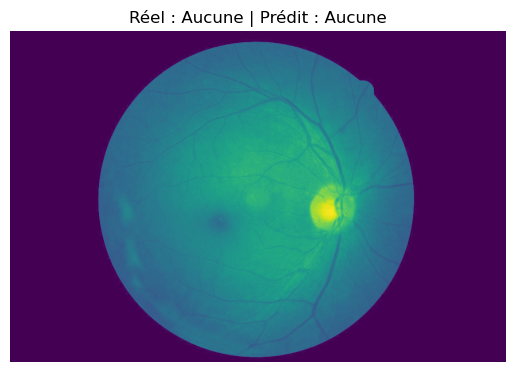

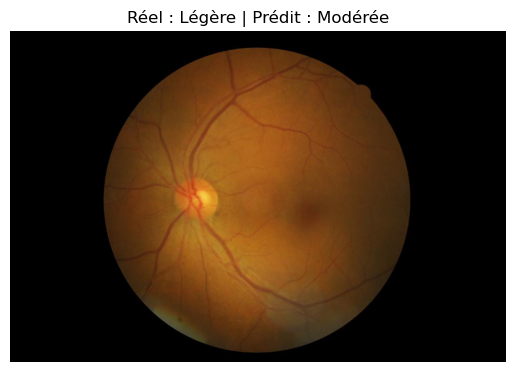

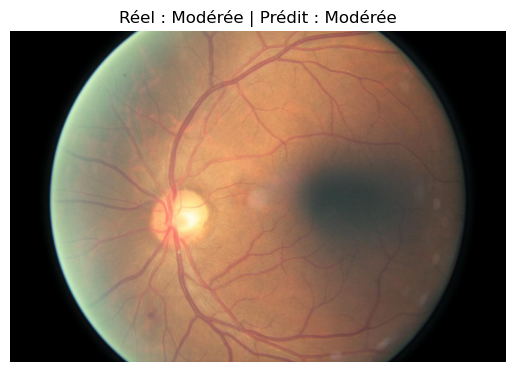

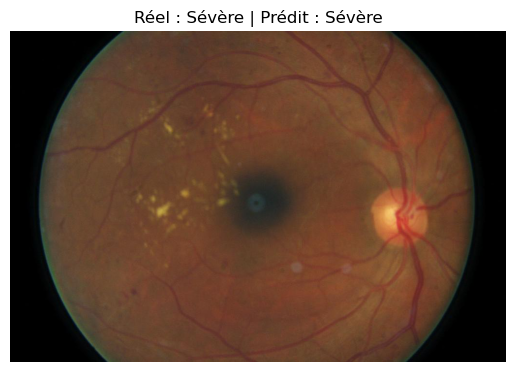

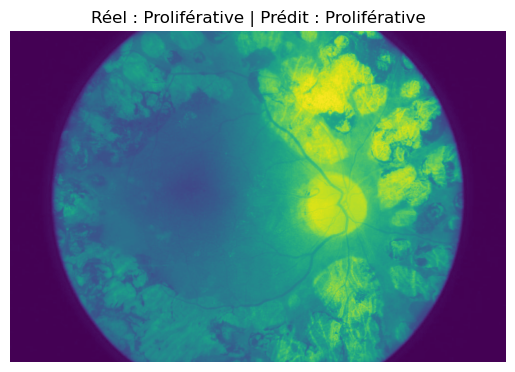


--- Rapport de classification ---
               precision    recall  f1-score   support

       Aucune       1.00      1.00      1.00         1
       Légère       0.00      0.00      0.00         1
      Modérée       0.50      1.00      0.67         1
       Sévère       1.00      1.00      1.00         1
Proliférative       1.00      1.00      1.00         1

     accuracy                           0.80         5
    macro avg       0.70      0.80      0.73         5
 weighted avg       0.70      0.80      0.73         5



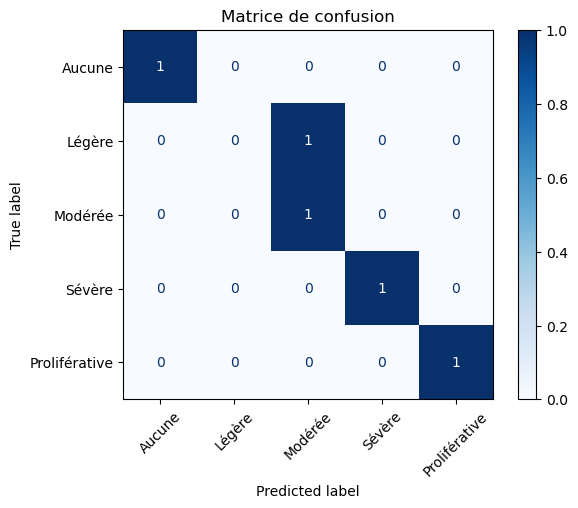

In [26]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Dictionnaire index -> nom de classe
idx_to_class = {
    0: "Aucune",
    1: "Légère",
    2: "Modérée",
    3: "Sévère",
    4: "Proliférative"
}

# Pour stocker les vraies et prédictions
all_preds = []
all_labels = []

# Fonction de prétraitement
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image)
    image = image.unsqueeze(0)
    return image.to(device)

# Fonction de prédiction
def predict(image_path):
    model.eval()
    with torch.no_grad():
        image = preprocess_image(image_path)
        outputs = model(image)
        _, predicted = torch.max(outputs.data, dim=1)
        return predicted.item()

# Liste avec les chemins et la vérité terrain (true class)
image_paths = [
    ("E:/Split_Emmanuel/test/0/4928_right.jpeg", 0),
    ("E:/Split_Emmanuel/test/1/1369_left.jpeg", 1),
    ("E:/Split_Emmanuel/test/2/2729_right.jpeg", 2),
    ("E:/Split_Emmanuel/test/3/17972_left.jpeg", 3),
    ("E:/Split_Emmanuel/test/4/33725_left.jpeg", 4),
]

# Boucle principale : prédictions + affichage
for path, true_idx in image_paths:
    pred_idx = predict(path)
    all_preds.append(pred_idx)
    all_labels.append(true_idx)

    # Affichage image + réel/predit
    image = Image.open(path)
    plt.imshow(image)
    plt.title(f"Réel : {idx_to_class[true_idx]} | Prédit : {idx_to_class[pred_idx]}")
    plt.axis("off")
    plt.show()

# Métriques
print("\n--- Rapport de classification ---")
print(classification_report(all_labels, all_preds, target_names=list(idx_to_class.values()), zero_division=0))

# Matrice de confusion
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(idx_to_class.values()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matrice de confusion")
plt.show()


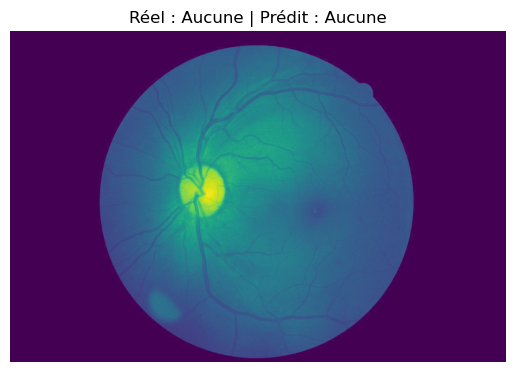

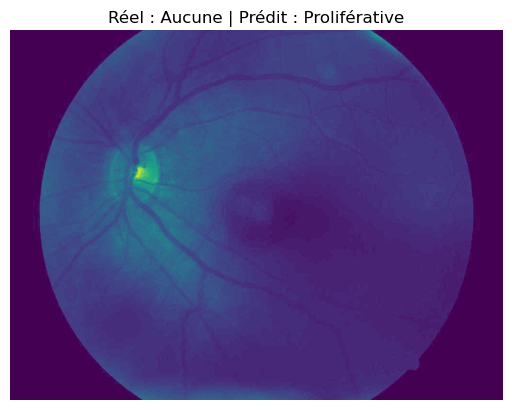

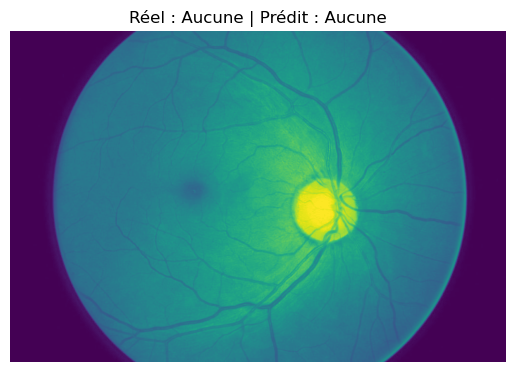

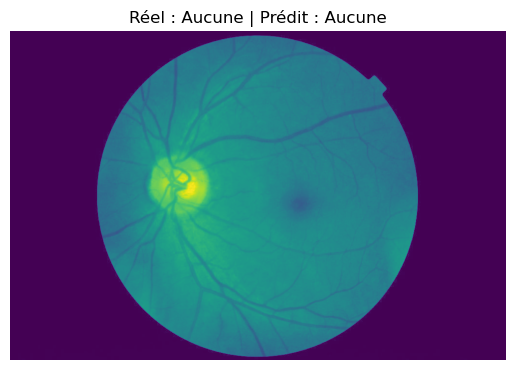

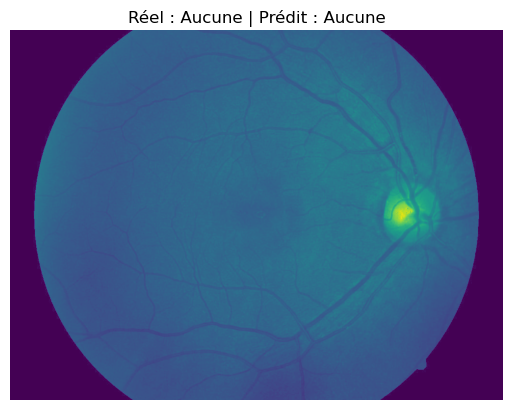


--- Rapport de classification ---
               precision    recall  f1-score   support

       Aucune       0.83      0.97      0.90       196
       Légère       0.91      0.70      0.79       193
      Modérée       0.78      0.87      0.82       198
       Sévère       0.83      0.88      0.85       202
Proliférative       0.94      0.83      0.89       199

     accuracy                           0.85       988
    macro avg       0.86      0.85      0.85       988
 weighted avg       0.86      0.85      0.85       988



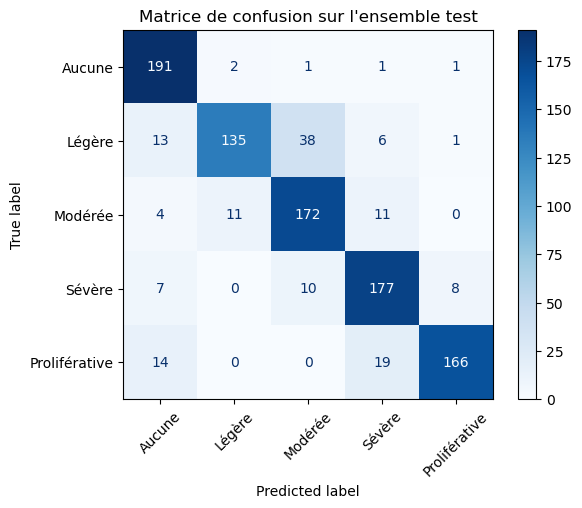

In [27]:
import os
import glob
import torch
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Dictionnaire index -> label
idx_to_class = {
    0: "Aucune",
    1: "Légère",
    2: "Modérée",
    3: "Sévère",
    4: "Proliférative"
}

# Inverser le dictionnaire pour label -> index
class_to_idx = {v: k for k, v in idx_to_class.items()}

# Listes pour stocker les vraies étiquettes et les prédictions
all_preds = []
all_labels = []

# Prétraitement (doit être défini comme à l'entraînement)
def preprocess_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image)  # Assure-toi que transform est bien défini
    image = image.unsqueeze(0)
    return image.to(device)

# Fonction de prédiction
def predict(image_path):
    model.eval()
    with torch.no_grad():
        image = preprocess_image(image_path)
        outputs = model(image)
        _, predicted = torch.max(outputs.data, 1)
        return predicted.item()

# Chemin vers les images de test
test_dir = "E:/Split_Emmanuel/test"

num_to_display = 5
displayed = 0

# Boucle sur toutes les classes
for class_idx in range(5):
    class_folder = os.path.join(test_dir, str(class_idx))
    image_paths = glob.glob(os.path.join(class_folder, "*.jpeg"))

    for path in image_paths:
        true_idx = class_idx
        pred_idx = predict(path)

        all_labels.append(true_idx)
        all_preds.append(pred_idx)

        # Affichage limité à num_to_display images
        if displayed < num_to_display:
            image = Image.open(path)
            plt.imshow(image)
            plt.title(f"Réel : {idx_to_class[true_idx]} | Prédit : {idx_to_class[pred_idx]}")
            plt.axis("off")
            plt.show()
            displayed += 1

# Affichage des métriques globales
print("\n--- Rapport de classification ---")
print(classification_report(all_labels, all_preds, target_names=list(idx_to_class.values()), zero_division=0))

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(idx_to_class.values()))
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Matrice de confusion sur l'ensemble test")
plt.show()
